## **Name:** Affan Zulfiqar
## **Reg No:** B22F0144AI050
## **Course:** ANN-LAB-05
## **Section:** AI22-Fall-Blue

**Lab Task**
1. Implemented an ANN model with Forward and Backpropagation.
2. Applied it to Multi Class Classification.
3. Used activation function of your own choice.
4. Optimized using Adam Optimizer or any other optimizer.
5. Weight Initialization, Batch Normalization, and Dropout Regularization.
6. Evaluated model performance using accuracy score.
7. Plotted loss curve to analyze convergence

**Importing Required Libraries**

In [12]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


**Loading and Preprocessing the Data**

* loaded the dataset and separate the features (X) from the target (y).
* LabelEncoder is used to convert categorical target labels into numerical values.
* train_test_split splits the dataset into 80% for training and 20% for testing.

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv("/content/Student_performance_data _.csv")
print(data.head())

print("\nDataset Information:")
print(data.info())

X = data.drop(columns=["StudentID", "GPA", "GradeClass"])
y = data["GradeClass"]

X = pd.get_dummies(X, drop_first=True)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTraining data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

   StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001   17       1          0                  2        19.833723   
1       1002   18       0          0                  1        15.408756   
2       1003   15       0          2                  3         4.210570   
3       1004   17       1          0                  3        10.028829   
4       1005   17       1          0                  2         4.672495   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0         7         1                2                0       0      1   
1         0         0                1                0       0      0   
2        26         0                2                0       0      0   
3        14         0                3                1       0      0   
4        17         1                3                0       0      0   

   Volunteering       GPA  GradeClass  
0             0  2.929196         2.0  
1             0  3

**Feature scaling**

I scaled the features using StandardScaler to normalize the data. This helps the model to learn effectively, especially when using neural networks.

In [14]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

**Building the ANN Model**

A Sequential model is created with three hidden layers.
Each layer uses LeakyReLU activation function, dropout regularization, and batch normalization for stability.
The output layer uses softmax for multi-class classification.

In [15]:
def build_ann_model(input_shape, num_classes):
    model = models.Sequential([
        layers.Input(shape=(input_shape,)),  # Input layer
        layers.Dense(128, kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        layers.BatchNormalization(),
        layers.LeakyReLU(),
        layers.Dropout(0.1),

        layers.Dense(128, kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        layers.BatchNormalization(),
        layers.LeakyReLU(),
        layers.Dropout(0.1),

        layers.Dense(64, kernel_initializer='he_normal'),
        layers.BatchNormalization(),
        layers.LeakyReLU(),
        layers.Dropout(0.1),

        layers.Dense(num_classes, activation='softmax')
    ])
    return model


**Compiling and Training the Model**

* Compile the model using the Adam optimizer with a learning rate of 0.05.
* Use sparse_categorical_crossentropy as the loss function for multi-class classification.
* The model is trained for 100 epochs with batch size 64 and a validation split of 0.2.

In [16]:
input_shape = X_train.shape[1]
model = build_ann_model(input_shape, num_classes=5)

optimizer = tf.keras.optimizers.Adam(learning_rate=0.05)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2, verbose=1)

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.5466 - loss: 4.5293 - val_accuracy: 0.4282 - val_loss: 2.0440
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6588 - loss: 1.3989 - val_accuracy: 0.5196 - val_loss: 1.5935
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6768 - loss: 1.1248 - val_accuracy: 0.6240 - val_loss: 1.2053
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6832 - loss: 1.0092 - val_accuracy: 0.4830 - val_loss: 1.5364
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6822 - loss: 1.0471 - val_accuracy: 0.6371 - val_loss: 1.1877
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6685 - loss: 1.0562 - val_accuracy: 0.6919 - val_loss: 1.0329
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6883 - loss: 0.9921 - val_accuracy: 0.6841 - val_loss: 1.0017
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6811 - loss: 0.9776 - val_accuracy: 0.658

**Evaluating the Model**

The model predicts on the test data, and we convert the predictions to class labels using np.argmax.
The accuracy is then calculated using accuracy_score.

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Test Accuracy: 0.7161


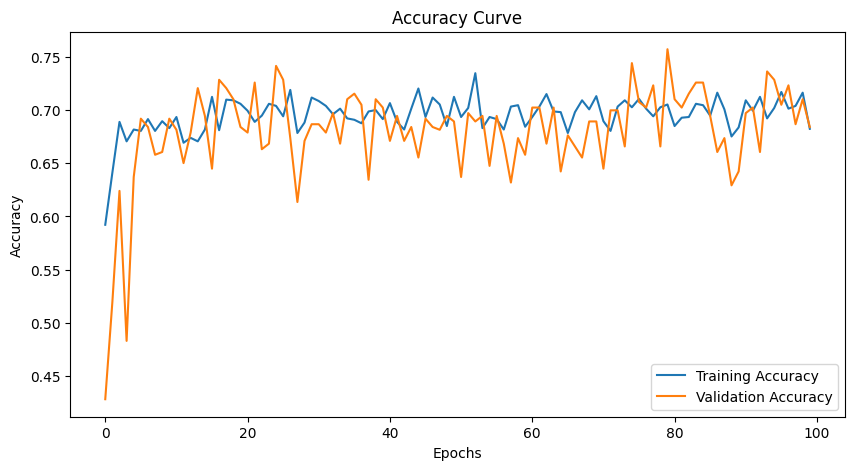

In [19]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Test Accuracy: {accuracy:.4f}")

plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


**Plotting the Loss Curve**

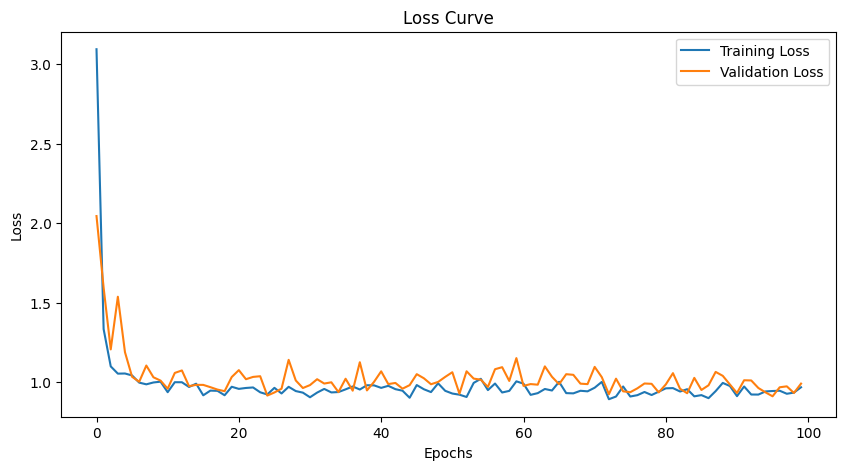

In [18]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Analysis:**

The loss curve shows that both training and validation losses initially decrease rapidly, indicating effective learning. After around 20 epochs, both losses stabilize around 1.0, suggesting the model has reached a performance plateau. The close alignment of training and validation losses implies that the model is not overfitting.